
# **Feature** **Scaling**:
  Always applied to column

  Types of feature scaling

1.  Normalization

For a column with values x x1 x2... for an arbitrary value x in a given column
the below formula gives the standardized value and it will always be between 0 and 1

    (X-Xmin)/(Xmax-Xmin)

2.  Standardization


    (X-average of column)/standard dev


   All values are normally between -3 and 3

for example A,B,C three persons.

A= 70000 , 45 years

B= 60000 , 44 years

C= 52000 , 40 years

See if B is more similar to A or C, more relevant for clustering , here you see the salary difference of A and B is 10000 but age difference is 1 year whereas when we compare B and C salary difference is less but age difference is more

So, in such cases we use feature scaling to be able to judge on the same ground.

Normalize the variables.

we cant compare age and salary differences

**Apply normalization to salary section**

70000-52000/70000-52000= 1

60000-52000/70000-52000= 0.444

52000-52000/''=0
** Apply Normalization to age section we get**

   1

   0.8

   0

so we see that B is closest to Blue in age and almost in middle for salary


# Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset= pd.read_csv("/content/Data.csv")
dataset.head()
#features are independent variables that is country age salary
#dependent variable is purchased
# x=dataset.drop('Purchased',axis=1)
# y=dataset['Purchased']
x=dataset.iloc[:,:-1].values# here first colon specifies the rows we want
# to take and we want all rows so [:] for columns to take all except last use[:-1]
y=dataset.iloc[:,-1].values#-1 or 3 both works fine
print(x)
print(y)
dataset

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


# Taking care of missing data

we can delete that line if the dataset is large

other method is replace the missing salary by the average of all

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(x[:,1:3])
x[:,1:3]=imputer.transform(x[:,1:3])
print(x)


[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


# encoding categorical data

In [ ]:
 #first column is countries so convert it to numbers
 #the model might misinterpret that because france is 0 th salary is so
 #to avoid such interpretation we adopt a different method
 #we will make different columns
 #france 100 germany 010 spain 001
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough') #transformation what kind and where
x=np.array(ct.fit_transform(x))
print(x)
#

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


# **Label Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
print(y)


[0 1 0 0 1 1 0 1 0 1]


In [ ]:
#apply feature scaling after splitting the data set
#so we have to provide test data as it is and not hamper that data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)#random state ensures that same data is divided
print(x_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


# Feature Scaling
Normalization is done when data is normally distributed and standardization is done all the time

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train[:,3:]=sc.fit_transform(x_train[:,3:])
x_test[:,3:]=sc.transform(x_test[:,3:])
x_test


array([[ 2.87e+01,  7.80e+01,  1.01e+03, -2.90e-01],
       [ 1.75e+01,  4.94e+01,  1.02e+03,  7.69e-01],
       [ 1.49e+01,  4.31e+01,  1.02e+03,  1.77e+00],
       ...,
       [ 1.22e+01,  4.49e+01,  1.02e+03,  1.02e+00],
       [ 2.73e+01,  4.79e+01,  1.00e+03, -9.64e-01],
       [ 1.73e+01,  4.00e+01,  1.01e+03,  6.52e-02]])

#SIMPLE REGRESSION MODEL

In [ ]:
#get the dataset
#import the libraries
#import thr dataset
#look for missing data
#categorical data
#train test split
#feature scaling
#simple linear regression
#multiple linear regression
#polynomial regression
#support vector machine / regression


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df= pd.read_csv("/content/Salary_Data.csv")
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print(x_test)
y_pred=regressor.predict(x_test)
print(y_pred)
print(y_test)
print(regressor.coef_[0])
print(regressor.intercept_)

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]]
[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]
[ 37731. 122391.  57081.  63218. 116969. 109431.]
9312.575126729189
26780.09915062818


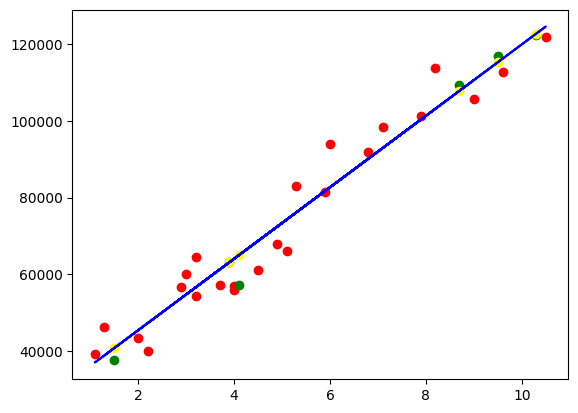

In [ ]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.scatter(x_test,y_test,color='green')
plt.scatter(x_test,regressor.predict(x_test),color='yellow')

# Multiple linear regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.metrics import accuracy_score

dataset=pd.read_csv("/content/50_Startups.csv")
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
 # encoding data now ct transform, one hot encoding is placed in the beginning
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
x_train=np.array(ct.fit_transform(x_train))
x_test=np.array(ct.transform(x_test))
# print(x_train)
# plt.scatter(x[:,0],y,color='red')
# plt.show()
# plt.scatter(x[:,1],y,color='blue')
# plt.show()
# plt.scatter(x[:,2],y,color='yellow')
# plt.show()
# plt.scatter(x[:,3],y,color='green')
# plt.show()
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
print(regressor.score(x_test,y_test))
print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]]))
x_train.shape

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]
0.9347068473282546
[181566.92]


(40, 6)

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.52924853278


Therefore, the equation of our multiple linear regression model is:

Profit=86.6×Dummy State 1−873×Dummy State 2+786×Dummy State 3+0.773×R&D Spend+0.0329×Administration+0.0366×Marketing Spend+42467.53

Important Note: To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.

# Polynomial Linear Regression

[-114454.54545455]


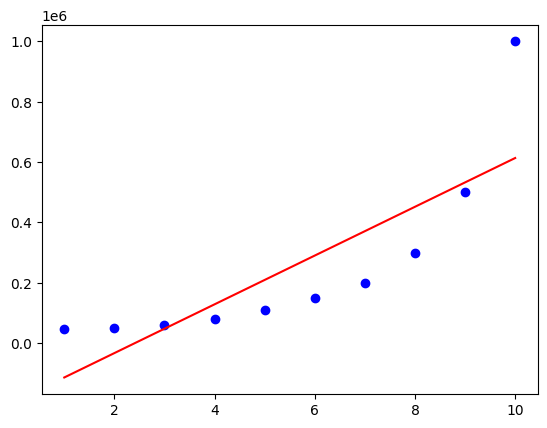

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#comparing the two models linear regression and polynomial regression
dataset=pd.read_csv("/content/Position_Salaries.csv")
x=dataset.iloc[:,1:-1].values#1st column is name of position and 2nd column is level as ceo is 10
y=dataset.iloc[:,-1].values

regressor=LinearRegression()
regressor.fit(x,y)

print(regressor.predict([[1]]))
plt.plot(x,regressor.predict(x),color='red')
plt.scatter(x,y,color='blue')
plt.show()
#we see that this is not correct negative values
#we want to take all data for training so we didnt split the data in training and test data

comparing lin reg model with pol reg model

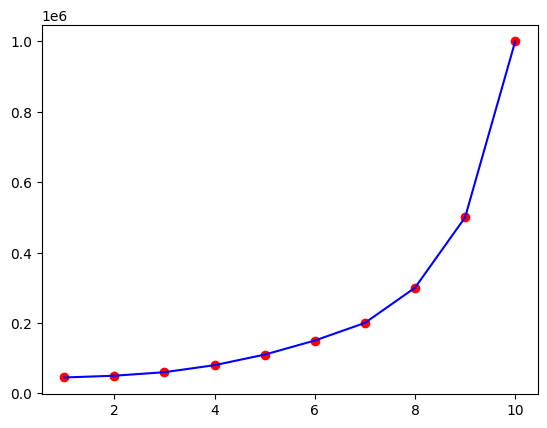

[172421.91732358]


<ipython-input-2-e0936d20dad0>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid=np.arange(min(x),max(x),0.1)


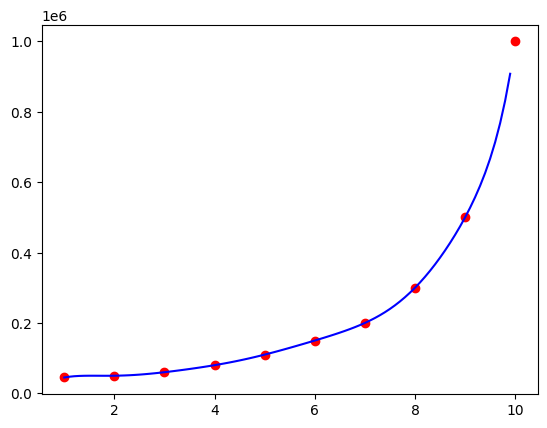

In [ ]:
poly_reg=PolynomialFeatures(degree=10)
x_poly=poly_reg.fit_transform(x)
regressor_2=LinearRegression()
regressor_2.fit(x_poly,y)
plt.scatter(x,y,color='red')
plt.plot(x,regressor_2.predict(x_poly),color='blue')
plt.show()
print(regressor_2.predict(poly_reg.fit_transform([[6.5]])))
x_grid=np.arange(min(x),max(x),0.1)
x_grid=x_grid.reshape((len(x_grid),1))  #reshaping the array
plt.scatter(x,y,color='red')
plt.plot(x_grid,regressor_2.predict(poly_reg.fit_transform(x_grid)),color='blue')
plt.show()

In [ ]:
#in svr model we apply feature scaling because there is no such direct relationship
#between dependent variable and features
#implicit relation bw dep and indep variables we use feature scaling
#in linear regression coefficient compensates for high and low value but in svr that
#doesnt happen so we apply feature scaling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv("/content/Position_Salaries.csv")
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

#FEATURE SCALING
#we applied feature scaling to x train and x test but here we apply it to y too because
#back then the y took values 0 and 1 but here the values is in the different range
#so we feature scale both x and y
#the values of x is very low compared to y so svr model might negelect to avoid that
#in linear reg we had explicit equation in svr implicit eqn
#and main reason nis x is very less compared to y

print(x)
# y2=(np.array([y]))
# y2.ndim
y=y.reshape(len(y),1)
y

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(x)
sc_y=StandardScaler()
y=sc_y.fit_transform(y)
print(x)
print(y)

[[-1.57]
 [-1.22]
 [-0.87]
 [-0.52]
 [-0.17]
 [ 0.17]
 [ 0.52]
 [ 0.87]
 [ 1.22]
 [ 1.57]]
[[-0.72]
 [-0.7 ]
 [-0.67]
 [-0.6 ]
 [-0.49]
 [-0.35]
 [-0.17]
 [ 0.18]
 [ 0.88]
 [ 2.64]]


In [ ]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')#the kernel can learn some linear relationships or non linear
#relationships like for linear there is linear kernel for non linear ; non linear kernels
#like rbf kernel basis
regressor.fit(x,y)
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[170370.02]])

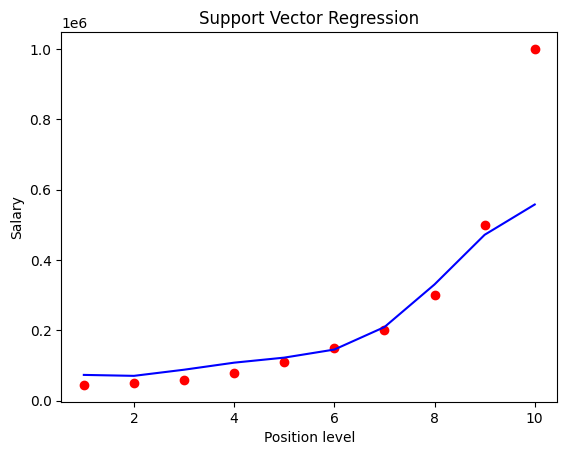

In [ ]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)),color='blue')
plt.title('Support Vector Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()



<ipython-input-29-3b0e7bde748a>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid=np.arange(min(sc_x.inverse_transform(x)),max(sc_x.inverse_transform(x)),0.1)


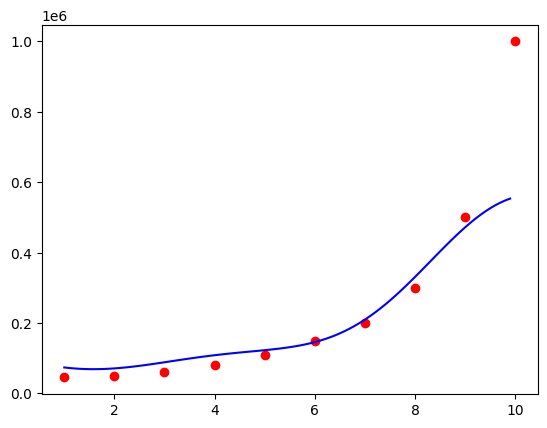

In [ ]:
x_grid=np.arange(min(sc_x.inverse_transform(x)),max(sc_x.inverse_transform(x)),0.1)
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='red')
x_grid=x_grid.reshape((len(x_grid),1))
plt.plot(x_grid,sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1,1)),color='blue')
plt.show()

# **DECISION TREE REGRESSION**

> REGRESSION TREE


this type of regression(decision tree) works well on any type of dataset with any number of features

no need to apply feature scaling in decision tree and random forest regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv("/content/Position_Salaries.csv")
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(x,y)
regressor.predict([[6.5]])
#decision tree model is not the best model to use for a single independent feature
#works well for high dimensional data set

array([150000.])

In [ ]:
 #if order matters we apply label encoder , if order doesnt matter like states countries we apply'
 #one hot encoder
 #no need to apply feature scaling for decision tree and random forest because
 #because predictions are resulting from splitting of data so no equations like previous
 #models
 #decision tree regressor predicts the continuous values
 #decision tree classifier predicts the category


# visualization

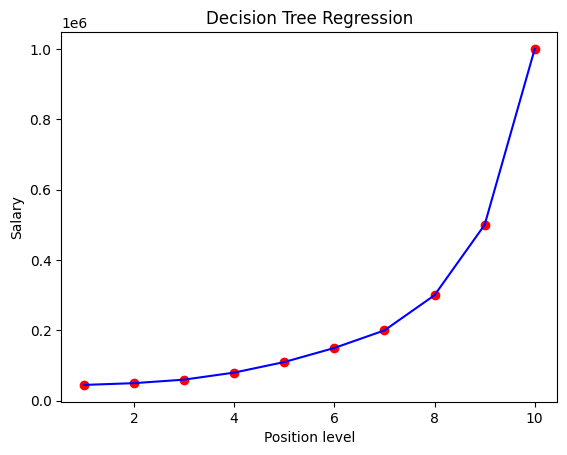

In [ ]:
plt.scatter(x,y,color='red')
plt.plot(x,regressor.predict(x.reshape(-1,1)),color='blue')
plt.title('Decision Tree Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

<ipython-input-20-7ee401be66a4>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid=np.arange(min(x),max(x),0.01)


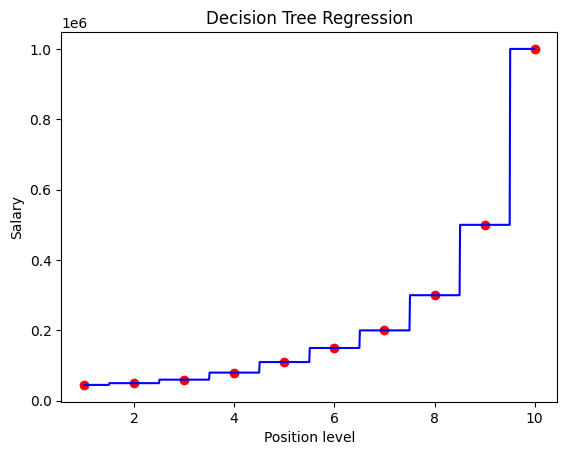

In [ ]:
x_grid=np.arange(min(x),max(x),0.01)
# x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color='red')
plt.plot(x_grid,regressor.predict(x_grid.reshape(-1,1)),color='blue')

plt.title('Decision Tree Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
# x_grid.reshape(-1,1)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
dataset=pd.read_csv("/content/Position_Salaries.csv")
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

regressor =RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(x,y)
regressor.predict([[6.5]])

array([167000.])

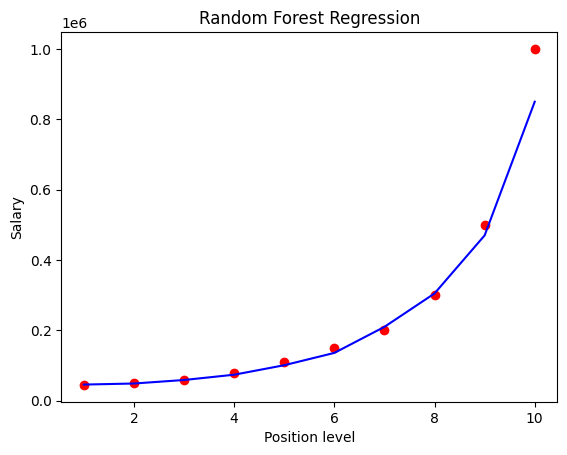

In [ ]:
plt.scatter(x,y,color='red')
plt.plot(x,regressor.predict(x),color='blue')
plt.title('Random Forest Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

<ipython-input-15-3943c60a7b19>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid=np.arange(min(x),max(x),0.01)


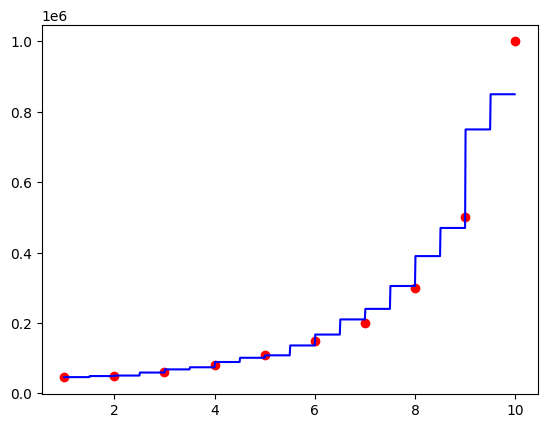

In [ ]:
x_grid=np.arange(min(x),max(x),0.01)
plt.scatter(x,y,color='red')
plt.plot(x_grid,regressor.predict(x_grid.reshape(-1,1)),color='blue')

# GENERIC MODEL TEMPLATES

multiple linear reg

In [ ]:
#to select the perfect model apply all of the models
#then check the accurate one
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data=pd.read_csv("/content/Data (1).csv")
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
np.set_printoptions(precision=2)
print(np.concatenate((regressor.predict(x_test).reshape(len(y_test),1),y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import r2_score
print(r2_score(y_test,regressor.predict(x_test)))

[[431.43 431.23]
 [458.56 460.01]
 [462.75 461.14]
 ...
 [469.52 473.26]
 [442.42 438.  ]
 [461.88 463.28]]
0.9325315554761303


polynomial linear reg

In [ ]:
#to select the perfect model apply all of the models
#then check the accurate one
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data=pd.read_csv("/content/Data (1).csv")
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x_train)

regressor=LinearRegression()
regressor.fit(x_poly,y_train)

np.set_printoptions(precision=2)
print(np.concatenate((regressor.predict(poly_reg.transform(x_test)).reshape(len(y_test),1),y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import r2_score
print(r2_score(y_test,regressor.predict(poly_reg.transform(x_test))))

[[433.94 431.23]
 [457.9  460.01]
 [460.52 461.14]
 ...
 [469.53 473.26]
 [438.27 438.  ]
 [461.66 463.28]]
0.9458192809530098


support vector machine

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv("/content/Data (1).csv")
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
y = y.reshape(len(y),1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[434.05 431.23]
 [457.94 460.01]
 [461.03 461.14]
 ...
 [470.6  473.26]
 [439.42 438.  ]
 [460.92 463.28]]


0.9480784049986258

Decision Tree Regression


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv("/content/Data (1).csv")

X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

[[431.28 431.23]
 [459.59 460.01]
 [460.06 461.14]
 ...
 [471.46 473.26]
 [437.76 438.  ]
 [462.74 463.28]]


0.922905874177941

Random Forest Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv("/content/Data (1).csv")
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

[[434.05 431.23]
 [458.79 460.01]
 [463.02 461.14]
 ...
 [469.48 473.26]
 [439.57 438.  ]
 [460.38 463.28]]


0.9615908334363876

# LOGISTIC REGRESSION CLASSIFICATION

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dataset=pd.read_csv("/content/Social_Network_Ads.csv")
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)
y_pred
classifier.predict(sc.transform([[30,87000]]))
# print(y_pred)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)) ,1))

from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

#visualization of results


[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]
[[65  3]
 [ 8 24]]


0.89

<ipython-input-5-c46734af0e94>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)


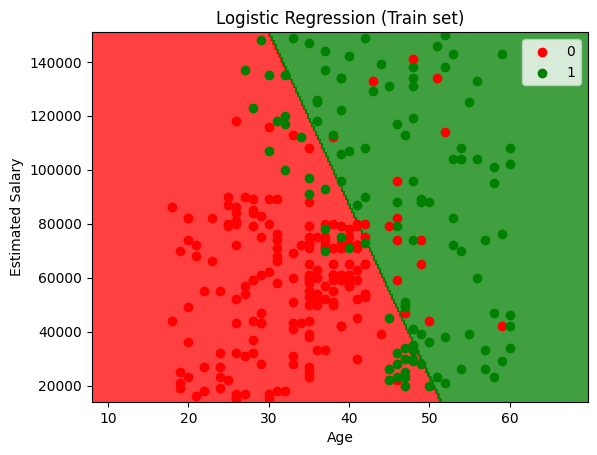

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set =sc.inverse_transform(x_train), y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-10,stop=x_set[:,0].max()+10,step=0.25),np.arange(start=x_set[:,1].min()-1000,stop=x_set[:,1].max()+1000,step=0.25))
plt.contourf(x1,x2,classifier.predict(sc.transform(np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


# KNN

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

<ipython-input-11-5d19a4b02694>:56: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


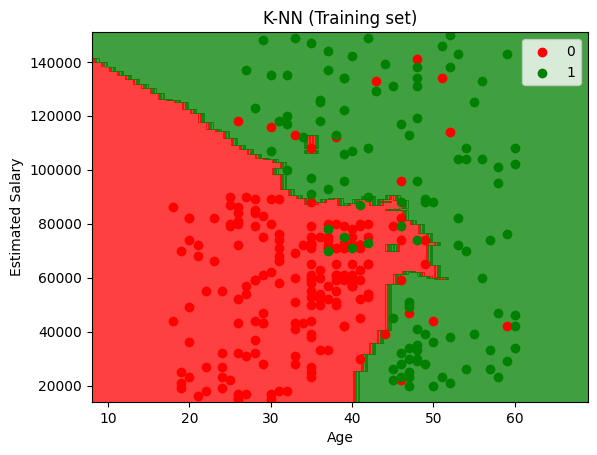

<ipython-input-11-5d19a4b02694>:73: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


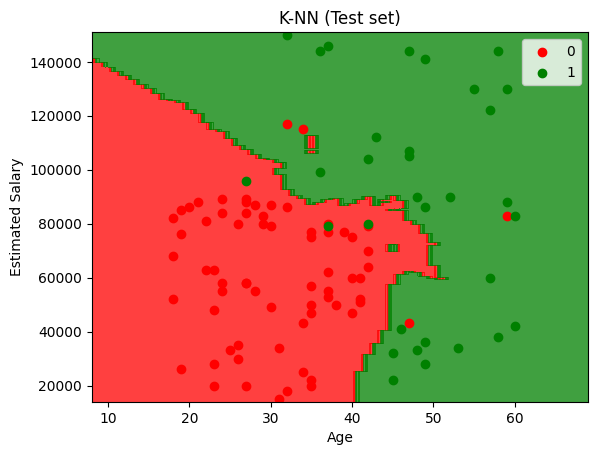

In [ ]:
# K-Nearest Neighbors (K-NN)

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting a new result
print(classifier.predict(sc.transform([[30,87000]])))

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


SVM CLASSIFIER

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv("/content/Social_Network_Ads.csv")
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)
y_pred
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)
print(classifier.predict(sc.transform([[30,87000]])))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]
[[66  2]
 [ 8 24]]
[0]


<ipython-input-2-828b52fd6552>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


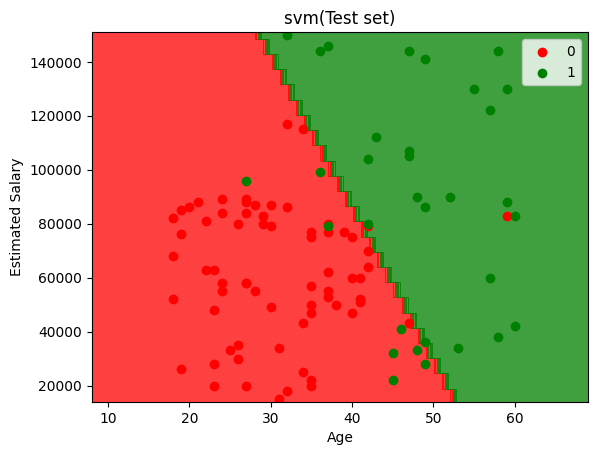

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('svm(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Non linear SVM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv("/content/Social_Network_Ads.csv")
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)
y_pred
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(classifier.predict(sc.transform([[30,87000]])))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]
[[64  4]
 [ 3 29]]
0.93
[0]


<ipython-input-4-828b52fd6552>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


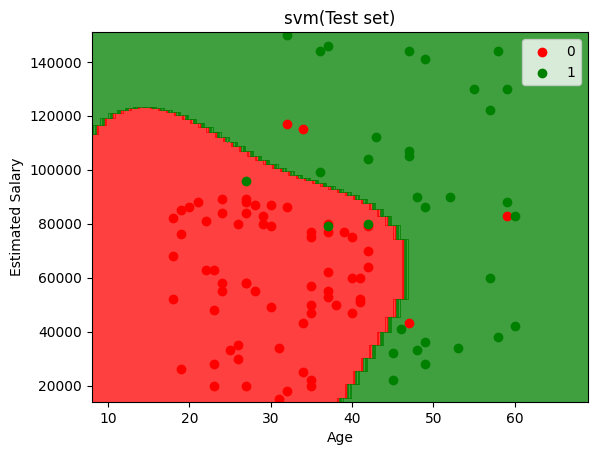

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('svm(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

naive bayes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv("/content/Social_Network_Ads.csv")
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)
y_pred
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)
print(classifier.predict(sc.transform([[30,87000]])))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]
[[65  3]
 [ 7 25]]
0.9
[0]


<ipython-input-3-828b52fd6552>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


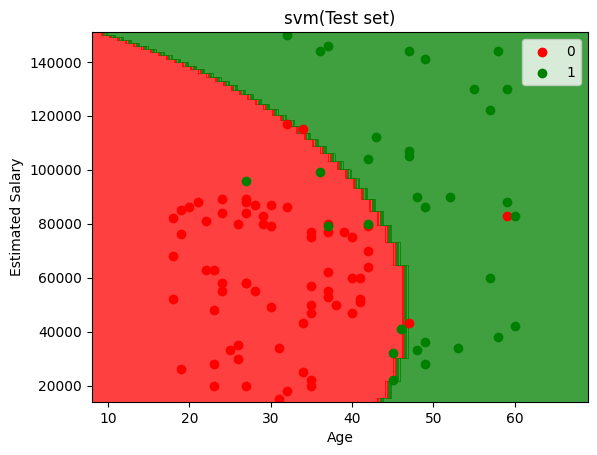

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('svm(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

DECISION TREE CLASSIFICATION

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]
[[62  6]
 [ 3 29]]
0.91
[0]


<ipython-input-6-1a624b9397c2>:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


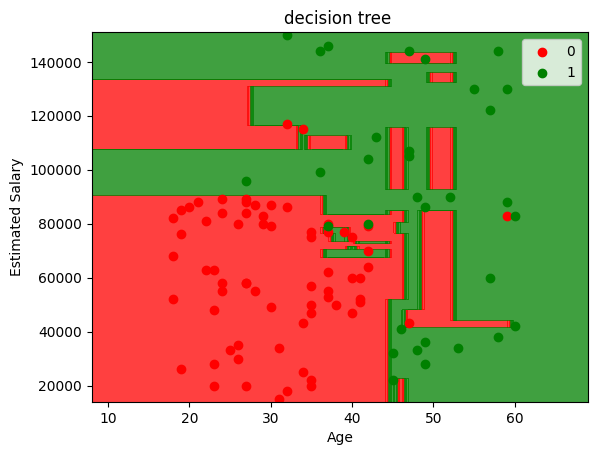

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv("/content/Social_Network_Ads.csv")
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)
y_pred
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(classifier.predict(sc.transform([[30,87000]])))

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('decision tree ')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]
[[63  5]
 [ 3 29]]
0.92
[0]


<ipython-input-9-011d04849d10>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


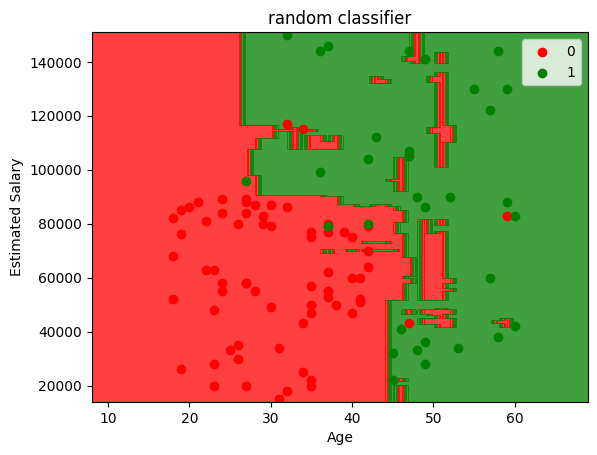

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv("/content/Social_Network_Ads.csv")
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(classifier.predict(sc.transform([[30,87000]])))

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('random classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# K MEANS CLUSTERING

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv("/content/Mall_Customers.csv")
x=dataset.iloc[:, 3:5].values #in k means clustering we dont know what to predict so
#we're taking everything as features
#to visualize the clusters in a 2d plot one feature on x axis and one on y axis
#we take annual income and spending score in feature matrix



array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

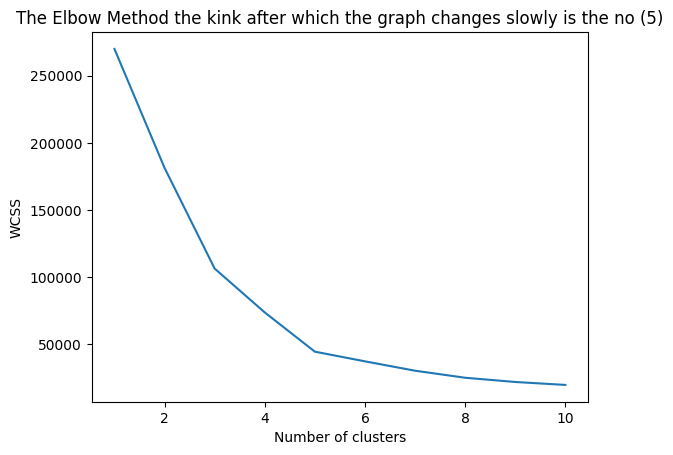

In [ ]:
#no need to scale because iincome is already scaled
#now we will use elbow method to find the optimal number of clusters
#WCSS METHOD

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)#init=kmeans means
#initialize as kmeans to avoid random initialization trap
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method the kink after which the graph changes slowly is the no (5)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)#init=kmeans means
#initialize as kmeans to avoid random initialization trap
y_kmeans=kmeans.fit_predict(x)#dependent var created on predicting is y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


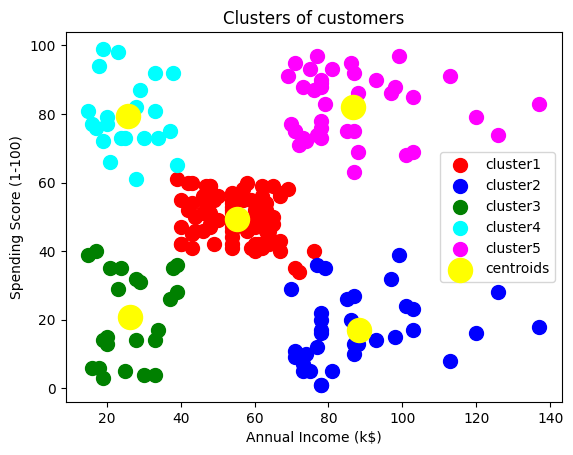

In [ ]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='cluster1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='cluster2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='cluster3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='cyan',label='cluster4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='magenta',label='cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

hierarchical clustering

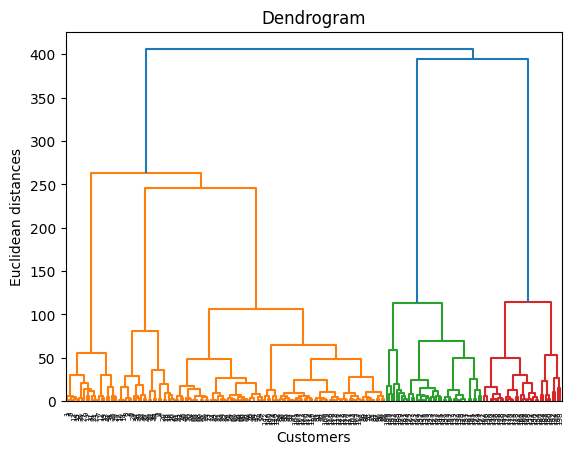

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv("/content/Mall_Customers.csv")
x=dataset.iloc[:, 3:5].values

#no need to scale because iincome is already scaled
#now we will use dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)
print( y_hc )

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


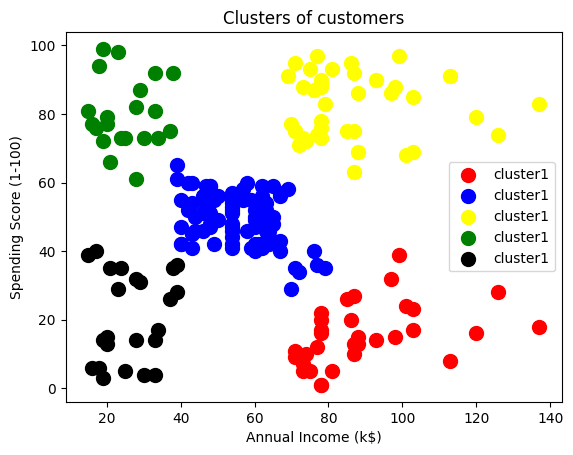

In [ ]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c='red',label='cluster1')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='blue',label='cluster1')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='yellow',label='cluster1')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=100,c='green',label='cluster1')
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=100,c='black',label='cluster1')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

ASSOCIATION ROLE LEARNING

It emphasizes on the thing that one person buys this also buys this so sort of managing stores the same way


APRIORI

*ECLAT*

support confidence lift

support : user watching M/total users

MARKET BASKET OPTIMIZATION:NO OF TRANSACTIONS CONTAINING I/TOTAL TRANSACTIONS

CONFIDENCE:USER WATCHLISTS CONTAINING M1 AND M2/USER WATCHLISTS CONTAINNG M1

LIFT =CONFIDENCE/SUPPORT

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv("/content/Market_Basket_Optimisation.csv",header=None)#data
#doesnt have a column heading
transactions=[]#format is not pandas df so we use list
for i in range(0,7501):
  transactions.append([str(dataset.values[i,j]) for j in range(0,20)])#apyori needs strings




In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5953 sha256=da3b0d7d43e59709651558e81c0cc91ad5d20e2da9a1c172a8c60f19577cf1e6
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


training the apriori model

In [ ]:
from apyori import apriori
rules=apriori(transactions,min_support=0.003,min_confidence=0.2,min_lift=3,min_length=2,max_length=3)
results=list(rules)
results

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

ECLAT

UPPER CONFIDENCE BOUND

NATURAL LANGUAGE PROCESSING

In [ ]:
#TSV FILES NAIVE BAYES ML ALGORITHM::
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv("/content/Restaurant_Reviews.tsv",delimiter='\t',quoting=3)
#quoting =3 means quote none

#deep cleaning of text
import re #helps in removing commas and apostrophe
import nltk #removing and a the which are not helpful in predicting if the review is
from nltk.corpus import stopwords
# nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer #stemming takes root words loved to love
corpus=[] #it will have different cleaned reviews

for i in range(1000): #1000 reviews
  review=re.sub('[^a-zA-Z]',' ',dataset['Review'][i]) #remove punctuation not a-z nor A-Z
  review=review.lower()
  review=review.split()
  ps=PorterStemmer()
  all_stopwords=stopwords.words('english')
  all_stopwords.remove('not')
  review=[ps.stem(word) for word in review if not word in set(all_stopwords)]
  review=' '.join(review)
  corpus.append(review)

corpus


['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)#msximum no of columnd in sparse matrix
x=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:,-1].values
len(x[0])

1500

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)
y_pred
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))



[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[55 42]
 [12 91]]


0.73

In [ ]:
new_review = 'I love this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[1]


DEEP LEARNING

In [ ]:
#NEURAL NETWORKS
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [ ]:
dataset=pd.read_csv("/content/Churn_Modelling.csv")
x=dataset.iloc[:,3:-1].values
y=dataset.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x[:,2]=le.fit_transform(x[:,2])



In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
x=np.array(ct.fit_transform(x))


In [ ]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [ ]:
#feature scaling is fundamental to deep learning
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
#building ANN
ann=tf.keras.models.Sequential()#sequence of layers
#add input layer and hidden layer
#in the input layer the number of neurons will be the feature
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))#units=no of hidden neurons in the hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))


In [ ]:
#adding output layer
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:

#training the ann model
ann.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5982 - loss: 0.6756
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8024 - loss: 0.4835
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7944 - loss: 0.4715
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8117 - loss: 0.4388
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8170 - loss: 0.4243
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8161 - loss: 0.4063
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8192 - loss: 0.4022
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8268 - loss: 0.3914
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8412 - loss: 0.3788
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8427 - loss: 0.3719
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8459 - loss: 0.3691
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
print(ann.predict(sc.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]])))#2d array

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.02439915]]


In [ ]:
y_pred=ann.predict(x_test)
y_pred=(y_pred>0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
#

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1518   77]
 [ 199  206]]


0.862

#CONVOLUTIONAL NEURAL NETWORKS
